## Задача 1. Линейная регрессия, метод градиентного спуска

Рыбина Екатерина Дмитриевна, 471 гр.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

import random
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.precision', 4)
random.seed(19)
np.set_printoptions(precision=4)
np.random.seed(19)

[x] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [27]:
def gradient_descent(X, y, alpha=1, epsilon=1):
    m, n = X.shape
    
    free_col = np.ones((X.shape[0], 1))
    x_long = np.concatenate((free_col,X), axis=1)
    
    n_new = n + 1
    
    W = np.ones(n_new,)
    
    old_cost = 0
    Q = 0
    k = 1
    
    while True:
        y_predicted = x_long.dot(W)

        loss = y_predicted - y
        RL2 = np.sum(np.square(W[1:]))
        Q = np.sum(loss ** 2) / n + 2.0 * alpha * RL2

        gradient = (2.0 / n) * x_long.T.dot(loss) + alpha * W
        lambd = 1 / k
        k += 1

        W = W - lambd * gradient    

        if abs(Q - old_cost) < epsilon:
            break
            
        old_cost = Q
        
    print(k)
    return W

[x] Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.

In [28]:
def stochastic_gd(X, y, alpha=1, epsilon=1E-4, epochs=1_000_000):
    m,n = X.shape

    free_col = np.ones((X.shape[0], 1))
    X_new = np.concatenate((free_col, X), axis=1)
    W = np.random.randn(n + 1).reshape(n + 1, 1)

    old_cost = 0
    Q = 0
    k = 1
    while True:
        idx = np.random.randint(0, m)

        X_i = X_new[idx, :].reshape(1, n + 1)
        y_i = y[idx].reshape(1, 1)

        y_predicted = X_i.dot(W)
        loss = y_predicted - y_i

        RL2 = np.sum(np.square(W[1:]))
        Q = np.sum(loss ** 2) / n + 2.0 * alpha *RL2

        gradient = 2.0 * X_i.T.dot(loss) + alpha * W
        lambd = 1/k
        lg = lambd * gradient
        W = W - lg

        cd = Q - old_cost
        old_cost = Q
        if (abs(cd) < epsilon) or np.all(abs(lg) < epsilon) \
                    or k == epochs:
                return W

        k = k + 1

[x] Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

In [29]:
def mini_batch_gd(X, y, batches=10, lambda_value=1E-2, epsilon=1E-4, epochs=100_000):
    W = np.ones(X.shape[1])

    cost = 0
    k = 1
    while True:
        for b in range(batches):
            idx = random.sample(range(X.shape[0]), batches)

            X_i = X[idx]
            y_i = y[idx]

            y_predicted = np.dot(X_i, W) + cost
            error = y_i - y_predicted

            cost = cost - (lambda_value * -2 * np.mean(error))

            gradient = -2 * np.dot(error, X_i)
            lg = lambda_value * gradient
            W = W - lg

            if np.all(abs(lg) < epsilon) \
                    or k == epochs:
                return W
        k = k + 1

[x] Найти данные, на которых интересно будет решать задачу регрессии (данные для предсказания стоимости машин). 

[x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).

In [30]:
df = pd.read_csv("car_price.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [32]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Id автомобиля в данном случае не влияет на анализ данных, поэтому можем удалить данный столбец

In [33]:
df = df.drop(columns=["car_ID"])

In [34]:
len(df['CarName'].unique())

147

Различных марок автомобилей много относительно их общего количества в наборе данных, чтобы судить о влияние марки на цену. Так же признаки carlength, carwidth, carheight и curbweight обобщаются признаком carbody.

In [35]:
df = df.drop(columns=["CarName", "carlength", "carwidth", "carheight", "curbweight"])

[x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

Оценим распределение цен на автомобили в целом, чтобы понять в какой ценовой категории люди предпочитают покуть машину

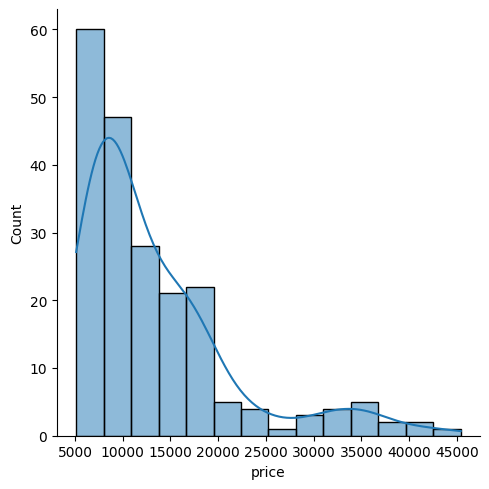

In [36]:
sns.displot(x='price', data=df, kde=True)

In [37]:
print("price       | count")
print("--------------------")
print(f" < 11k      | {df[df['price'] <= 11000].shape[0]}")
print("--------------------")
print(f" 11k-19k    | {df[(df['price'] > 11000) & (df['price'] <= 19000)].shape[0]}")
print("--------------------")
print(f" > 19k      | {df[df['price'] > 19000].shape[0]}")

price       | count
--------------------
 < 11k      | 109
--------------------
 11k-19k    | 68
--------------------
 > 19k      | 28


Большинство автомобилей в ценовой категории от 5000 до примерно 11000. Затем идут 11000-19000, и самые дорогие начиная от 19000.

Теперь рассмотрим как влияет на цену вид топлива, который используется машиной

<AxesSubplot: xlabel='fueltype', ylabel='price'>

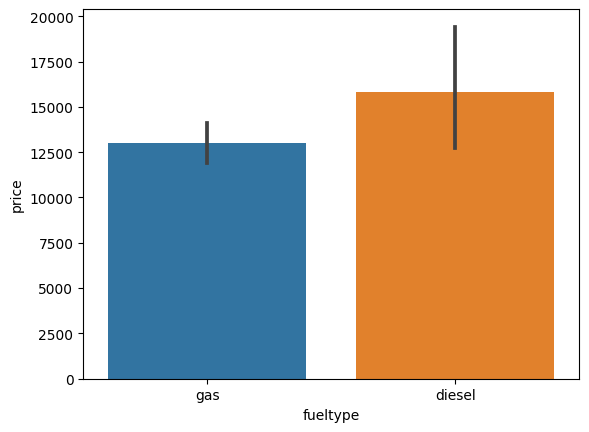

In [38]:
sns.barplot(x='fueltype', y='price', data=df)

В среднем машины на газу дешевле, чем дизельные

<AxesSubplot: xlabel='carbody', ylabel='price'>

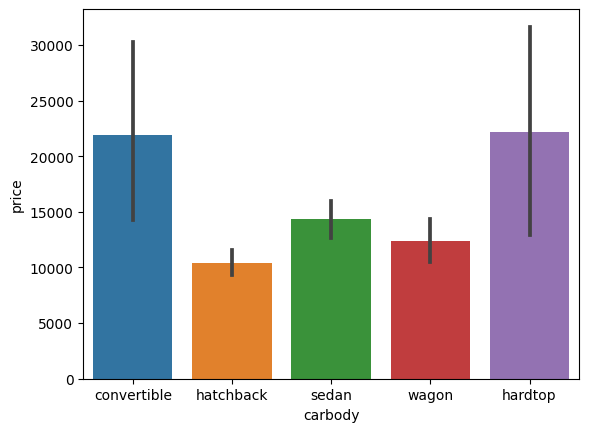

In [39]:
sns.barplot(x='carbody', y='price', data=df)

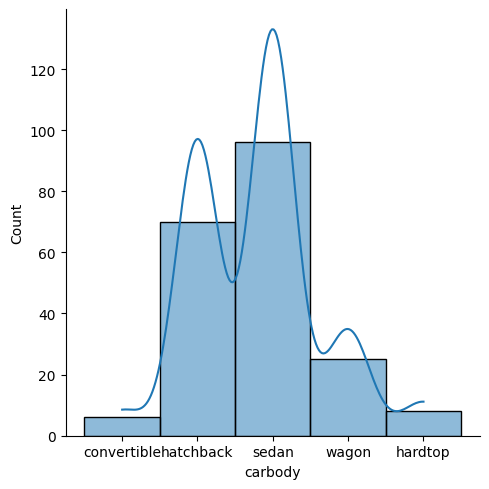

In [40]:
sns.displot(x='carbody', data=df, kde=True)

Sedan, hatchback и wagon являются наиболее предпачительными по цене чем convertible и hardtop

[x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [41]:
df['fueltype'].replace(['gas', 'diesel'], [1, 2], inplace=True)
df['aspiration'].replace(['std', 'turbo'], [1, 2], inplace=True)
df['doornumber'].replace(['two', 'four'], [2, 4], inplace=True)
df['carbody'].replace(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], [1,2,3,4,5], inplace=True)
df['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1,2,3], inplace=True)
df['enginelocation'].replace(['front', 'rear'], [1,2], inplace=True)
df['enginetype'].replace(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], [1,2,3,4,5,6,7], inplace=True)
df['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [4,6,5,3,12,2,8], inplace=True)
df['fuelsystem'].replace(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], [1,2,3,4,5,6,7,8], inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   enginetype        205 non-null    int64  
 9   cylindernumber    205 non-null    int64  
 10  enginesize        205 non-null    int64  
 11  fuelsystem        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

Теперь все признаки имееют числовые значения

[x] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[x] При обучении моделей использовать **масштабирование данных**.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

[x]  Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)**.

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(X_train_scaled, y_train)

print(f"Optimal numbers of feature: {rfecv.n_features_}")
features = list(X_train_scaled.columns[rfecv.support_])
print(f"Selected features: {features}")

Optimal numbers of feature: 17
Selected features: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg']


In [46]:
X_train_scaled = X_train_scaled[features]
X_test_scaled = X_test_scaled[features]

[x] Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = np.logspace(-3, 3, 10)
epsilon_grid = np.logspace(-3, 3, 10)

searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid, "tol": epsilon_grid}], scoring="neg_root_mean_squared_error", cv=2)
searcher.fit(X_train_scaled, y_train)

optimal_alpha = searcher.best_params_["alpha"]
print(f"Alpha: {optimal_alpha}")

optimal_epsilon = searcher.best_params_["tol"]
print(f"Epsilon: {optimal_epsilon}")

Alpha: 10.0
Epsilon: 0.001


[x] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**(+ stochastic_gd и mini_batch_gd). Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.

In [55]:
def get_model(X, w):
    n = X.shape[0]
    add_column = np.ones(n)
    X_update = np.c_[add_column, X]
    result = np.matmul(X_update, w)
    return result

In [56]:
w = gradient_descent(X_train_scaled, y_train, alpha=optimal_alpha, epsilon=optimal_epsilon)

y_train_gd_model = get_model(X_train_scaled, w)
y_test_gd_model = get_model(X_test_scaled, w)

976


In [57]:
w_stoch = stochastic_gd(X_train_scaled, y_train.to_numpy(), alpha=optimal_alpha, epsilon=optimal_epsilon)

y_train_sgd_model = get_model(X_train_scaled, w_stoch)
y_test_sgd_model  = get_model(X_test_scaled, w_stoch)

[x] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.

In [58]:
ridge_model = Ridge(alpha=optimal_alpha, tol=optimal_epsilon)
ridge_model.fit(X_train_scaled, y_train)

y_train_ridge_model = ridge_model.predict(X_train_scaled)
y_test_ridge_model = ridge_model.predict(X_test_scaled)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
my_lr_train_mse = mean_squared_error(y_train, y_train_gd_model, squared=True)
my_lr_test_mse = mean_squared_error(y_test, y_test_gd_model, squared=True)

sgd_model_train_mse = mean_squared_error(y_train, y_train_sgd_model, squared=True)
sgd_model_test_mse = mean_squared_error(y_test, y_test_sgd_model, squared=True)

ridge_model_train_mse = mean_squared_error(y_train, y_train_ridge_model, squared=True)
ridge_model_test_mse = mean_squared_error(y_test, y_test_ridge_model, squared=True)

#RMSE
my_lr_train_rmse = mean_squared_error(y_train, y_train_gd_model, squared=False)
my_lr_test_rmse = mean_squared_error(y_test, y_test_gd_model, squared=False)

sgd_model_train_rmse = mean_squared_error(y_train, y_train_sgd_model, squared=False)
sgd_model_test_rmse = mean_squared_error(y_test, y_test_sgd_model, squared=False)

ridge_model_train_rmse = mean_squared_error(y_train, y_train_ridge_model, squared=False)
ridge_model_test_rmse = mean_squared_error(y_test, y_test_ridge_model, squared=False)

#R^2
my_lr_train_r2 = r2_score(y_train, y_train_gd_model)
my_lr_test_r2 = r2_score(y_test, y_test_gd_model)

sgd_model_train_r2 = r2_score(y_train, y_train_sgd_model)
sgd_model_test_r2 = r2_score(y_test, y_test_sgd_model)

ridge_model_train_r2 = r2_score(y_train, y_train_ridge_model)
ridge_model_test_r2 = r2_score(y_test, y_test_ridge_model)


In [69]:
print("my                           | SGD                 | ridge")
print("-----------------------------------------------------------------")
print("MSE")
print(f"train:{my_lr_train_mse}     | {sgd_model_train_mse}  | {ridge_model_train_mse}")
print(f"test:{my_lr_test_mse}       | {sgd_model_test_mse}  | {ridge_model_test_mse}\n")
print("RMSE")
print(f"train:{my_lr_train_rmse}     | {sgd_model_train_rmse}   | {ridge_model_train_rmse}")
print(f"test:{my_lr_test_rmse}       | {sgd_model_test_rmse}  | {ridge_model_test_rmse}\n")
print("R2")
print(f"train:{my_lr_train_r2}    | {sgd_model_train_r2}  | {ridge_model_train_r2}")
print(f"test:{my_lr_test_r2}     | {sgd_model_test_r2} | {ridge_model_test_r2}\n")

my                           | SGD                 | ridge
-----------------------------------------------------------------
MSE
train:34985690.596735924     | 152460241.55978176  | 7575504.111679892
test:42802684.06127444       | 155915757.80697432  | 12887840.142055217

RMSE
train:5914.8702941599595     | 12347.47915810275   | 2752.3633683944954
test:6542.376025670982       | 12486.623154679344  | 3589.963807903252

R2
train:0.42598998613228245    | -1.501414260496853  | 0.8757087498908476
test:0.38221739273407485     | -1.2503739072518143 | 0.8139863501646897



[x] Повторить тоже самое, но используя **кросс-валидацию**

In [70]:
from sklearn.model_selection import KFold, cross_validate

scoring = {'mse': 'neg_mean_squared_error',
           'rmse': 'neg_root_mean_squared_error',
           'r2': 'r2'}

fold = KFold(n_splits=5)

In [71]:
table_result = pd.DataFrame()

In [72]:
table = cross_validate(Ridge(), X, y, cv=fold, scoring=scoring, return_train_score=True)

table_result['mse-train'] = table['train_mse']*-1
table_result['mse-test'] = table['test_mse']*-1
table_result['rmse-train'] = table['train_rmse']*-1
table_result['rmse-test'] = table['test_rmse']*-1
table_result['r2-train'] = table['train_r2']
table_result['r2-test'] = table['test_r2']

[x] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. 

In [73]:
table_result = table_result.T

table_result['E'] = table_result.mean(axis=1)
table_result['STD'] = table_result.std(axis=1)

table_result

,0,1,2,3,4,E,STD
mse-train,6.6471e+06,7.2529e+06,7.4322e+06,8.3048e+06,7.9121e+06,7.5098e+06,5.6749e+05
mse-test,1.5576e+07,1.6640e+07,1.3436e+07,1.1890e+07,1.4630e+07,1.4434e+07,1.6539e+06
rmse-train,2.5782e+03,2.6931e+03,2.7262e+03,2.8818e+03,2.8128e+03,2.7384e+03,1.0390e+02
rmse-test,3.9467e+03,4.0792e+03,3.6656e+03,3.4482e+03,3.8249e+03,3.7929e+03,2.1986e+02
r2-train,8.9132e-01,8.3496e-01,8.9907e-01,8.6820e-01,8.9430e-01,8.7757e-01,2.3812e-02
r2-test,7.8618e-01,8.7129e-01,2.7856e-01,8.1371e-01,1.8699e-01,5.8734e-01,2.9224e-01
